In [105]:
import pandas as pd
import numpy as np 


df_csv = pd.read_csv('imdb_csv.csv', index_col=[0])


In [127]:
import matplotlib.pyplot as plt

In [106]:
import pandas as pd
import json

import json 
import pandas as pd

# Load the json data
with open('imdb_json.json') as f:
  data = json.load(f)

  # Extract the year and movie data into separate variables  
  years = list(data.keys())

movies = list(data.values())

df_json = pd.DataFrame({"year":years, 
                         'title' :None,
                         'composer':None, 
                         'cast':None, 
                         'language':None, 
                         'director':None, 
                         'country':None, 
                         'genre':None,
                         'writer':None})


for i, movi in enumerate(movies[0]):
  
  if i<len(movies):
    df_json.iloc[i,1] = list(movi.keys())[0]
  
    df_json.iloc[i,2:] = pd.json_normalize(movies[0][i][list(movi.keys())[0]])


In [107]:
import pandas as pd
import json

import json 
import pandas as pd

# Load the json data
with open('imdb_json.json') as f:
  data = json.load(f)

  # Extract the year and movie data into separate variables  
  years = list(data.keys())
  print(data.keys())

dict_keys(['2003', '2021', '1994', '2016', '1992', '2004', '1991', '2010', '2019', '1999', '1988', '2005', '1990', '1972', '2001', '2012', '2000', '1998', '1993', '1973', '1996', '1986', '2002', '1985', '1997', '2008', '1974', '2015', '2017', '2007', '1989', '1995', '1978', '1971', '1969', '1982', '1947', '1981', '2006', '1919', '1976', '1967', '1942', '1984', '2018', '1987', '1979', '2011', '2009', '1966', '1959', '2020', '1960', '1980', '1963', '1983', '1905', '2014', '1943', '2013', '1977', '1965', '1951', '1958', '1928', '2022', '1944', '1954', '1975', '1961', '1956', '1950', '1932', '1945', '1962', '1939', '1955', '1968', '1949', '1957', '1970', '1930', '1933', '1938', '1927', '1964', '1940', '1948', '1931', '1946', '1916', '1936', '1918', '1926', '1925', '1952', '1934', '1929', '1953', '1937', '1941', '2023', '1922', '1923', '1910', '1935', '1913', '1914', '1924'])


In [108]:
data = open('imdb_json.json')


In [109]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      109 non-null    object
 1   title     109 non-null    object
 2   composer  65 non-null     object
 3   cast      105 non-null    object
 4   language  101 non-null    object
 5   director  87 non-null     object
 6   country   102 non-null    object
 7   genre     107 non-null    object
 8   writer    82 non-null     object
dtypes: object(9)
memory usage: 7.8+ KB


In [110]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9756 entries, 0 to 9825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    9756 non-null   object 
 1   year     9756 non-null   int64  
 2   kind     9756 non-null   object 
 3   rating   8949 non-null   float64
 4   vote     8949 non-null   float64
 5   runtime  9756 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 533.5+ KB


In [111]:
# Convert the 'year' column in df_json to int64 to match the 'year' column in df_csv
df_json['year'] = df_json['year'].astype('int64')

In [112]:
# Merge the two dataframes on 'title' and 'year' using an outer join
merged_df = pd.merge(df_json, df_csv, how='outer', on=['title', 'year'])

In [113]:
merged_df.shape

(9864, 13)

In [114]:
merged_df.head()

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime
0,2003,Dinosaur Planet,NaN,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",tv mini series,7.7,474.0,50.0
1,2021,Daydream Obsession,NaN,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],NaN,NaN,NaN,NaN
2,1994,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],NaN,NaN,NaN,NaN
3,2016,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",NaN,NaN,NaN,NaN
4,1992,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",NaN,NaN,NaN,NaN


In [118]:
merged_df.head()

,year,title,composer,cast,language,director,country,genre,writer,kind,rating,vote,runtime
0,2003,Dinosaur Planet,NaN,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",tv mini series,7.7,474.0,50.0
1,2021,Daydream Obsession,NaN,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],NaN,NaN,NaN,NaN
2,1994,The Bonesetter,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],NaN,NaN,NaN,NaN
3,2016,Carandiru,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",NaN,NaN,NaN,NaN
4,1992,DarkWolf,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",NaN,NaN,NaN,NaN


In [119]:
# Summary statistics for numerical columns
print(merged_df.describe())

              year       rating          vote      runtime
count  9864.000000  8949.000000  8.949000e+03  9756.000000
mean   1994.451338     6.680635  2.121821e+04    88.129356
std      16.724045     1.285113  9.804873e+04    67.251045
min    1905.000000     1.000000  5.000000e+00     0.000000
25%    1989.000000     6.000000  2.830000e+02    60.000000
50%    1999.000000     6.900000  1.535000e+03    92.000000
75%    2003.000000     7.600000  7.570000e+03   107.000000
max    2023.000000     9.600000  2.462087e+06  1620.000000


In [120]:
# Check for duplicate rows
duplicates = merged_df.duplicated(['title', 'year'])
print(f"Number of duplicate entries: {duplicates.sum()}")

Number of duplicate entries: 581


In [121]:
# Remove duplicates if any
merged_df = merged_df.drop_duplicates(['title', 'year'])
print("Duplicates removed")


Duplicates removed


In [122]:
# Check for null values
print(merged_df.isnull().sum())

year           0
title          0
composer    9218
cast        9178
language    9182
director    9196
country     9181
genre       9176
writer      9201
kind         108
rating       774
vote         774
runtime      108
dtype: int64


In [123]:
# Fill null values in numerical columns with mean, median, or zero based on analysis
merged_df['rating'].fillna(merged_df['rating'].mean(), inplace=True)
merged_df['vote'].fillna(0, inplace=True)

In [124]:
# Fill null values in categorical columns with a placeholder value (e.g., 'Unknown')
merged_df[['composer', 'cast', 'language', 'director', 'country', 'genre', 'writer']] = \
    merged_df[['composer', 'cast', 'language', 'director', 'country', 'genre', 'writer']].fillna('Unknown')
print("Null values handled")

Null values handled


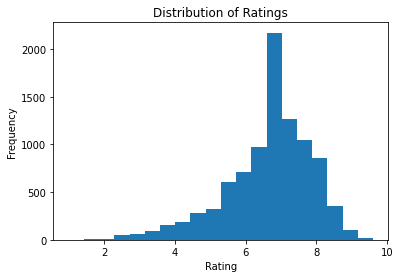

In [128]:
# Analyze the distribution of ratings
plt.hist(merged_df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()